In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('--Importing success')

--Importing success


In [2]:
df = pd.read_csv('/home/hadoop/Predict-Phone-Price/ML/phone_data_ml.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,Hãng sản xuất,Bộ nhớ trong_,Ram_,Chipset(CPU),man hinh,pin,Primary,Ultra_Wide,Telephoto,Giá
0,1,128.0,4.0,Helio G85,6.7,5000.0,50,2,0,3090000.0
1,2,128.0,6.0,Apple A15 Bionic,6.1,3279.0,12,12,0,25990000.0
2,14,256.0,8.0,Unisoc T606 (12 nm),7.0,5000.0,16,2,2,3390000.0
3,2,128.0,6.0,Apple A16 Bionic,6.1,3200.0,48,12,12,31990000.0
4,1,256.0,8.0,Snapdragon 8 Gen 2 for Galaxy,6.7,3700.0,12,12,0,25990000.0


In [5]:
df.isna().sum()

Hãng sản xuất    0
Bộ nhớ trong_    0
Ram_             0
Chipset(CPU)     0
man hinh         0
pin              0
Primary          0
Ultra_Wide       0
Telephoto        0
Giá              0
dtype: int64

Model

XGB


In [6]:
features = ['Hãng sản xuất', 'Bộ nhớ trong_', 'Ram_', 'man hinh', 'pin', 'Primary', 'Ultra_Wide', 'Telephoto']
target = 'Giá'

X = df[features]
y = df[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_xg = XGBRegressor()

cv_scores = cross_val_score(model_xg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 

model_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
y_train_pred = model_xg.predict(X_train)

y_test_pred = model_xg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")


Training Set Metrics:
Mean Squared Error (MSE): 1101219637211.856
Mean Absolute Error (MAE): 438392.1579063604
R-squared (R²): 0.9921846281331207


Test Set Metrics:
Mean Squared Error (MSE): 15521173093288.604
Mean Absolute Error (MAE): 2322158.6091549294
R-squared (R²): 0.9117552380980344


In [9]:
import matplotlib.pyplot as plt

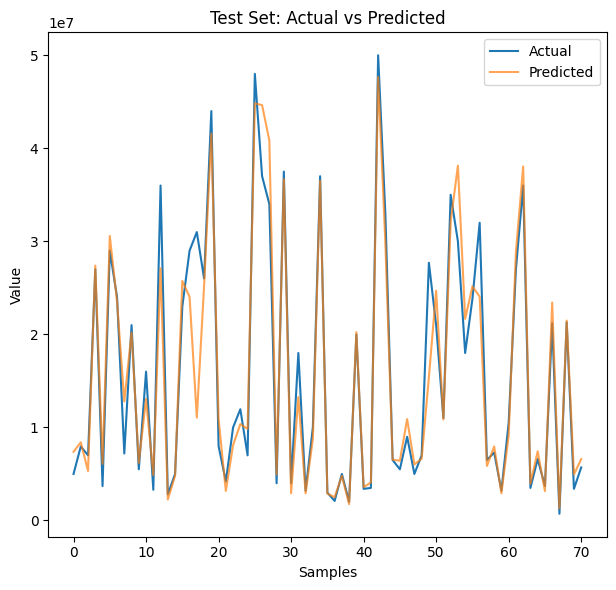

In [10]:
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cho tập kiểm tra
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred, label='Predicted', alpha=0.7)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


LinearRegression

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()

cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 

model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)

y_test_pred = model_lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")



Training Set Metrics:
Mean Squared Error (MSE): 49438604984793.42
Mean Absolute Error (MAE): 5302409.239341179
R-squared (R²): 0.6491334975516987


Test Set Metrics:
Mean Squared Error (MSE): 39600447984196.34
Mean Absolute Error (MAE): 5044777.999494479
R-squared (R²): 0.7748538668712078


Lasso

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lasso = Lasso()

cv_scores = cross_val_score(model_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error') 

model_lasso.fit(X_train, y_train)

y_train_pred = model_lasso.predict(X_train)

y_test_pred = model_lasso.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")



Training Set Metrics:
Mean Squared Error (MSE): 49438604984796.98
Mean Absolute Error (MAE): 5302409.288730163
R-squared (R²): 0.6491334975516734


Test Set Metrics:
Mean Squared Error (MSE): 39600450665008.375
Mean Absolute Error (MAE): 5044778.15807463
R-squared (R²): 0.774853851629601


Ridge

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_ridge = Ridge()

cv_scores = cross_val_score(model_ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Using negative MSE for cross-validation

model_ridge.fit(X_train, y_train)

y_train_pred = model_ridge.predict(X_train)

y_test_pred = model_ridge.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"R-squared (R²): {train_r2}")
print("\n")

print("Test Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"R-squared (R²): {test_r2}")



Training Set Metrics:
Mean Squared Error (MSE): 49439453257444.33
Mean Absolute Error (MAE): 5303884.973371689
R-squared (R²): 0.649127477348292


Test Set Metrics:
Mean Squared Error (MSE): 39645040909504.06
Mean Absolute Error (MAE): 5047763.24630238
R-squared (R²): 0.7746003362873635


In [15]:
import pickle

In [16]:
pickle.dump(model_xg, open('best_model.pkl', 'wb'))